In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

loan = pd.read_csv("loan.csv", low_memory = False)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [2]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [3]:
################################################  
##########      Data Cleaning      ############

# Remove all the columns where more than 30% data is missing

loan.dropna(axis=1, thresh=0.7*len(loan), inplace=True)


In [4]:
loan.shape

(39717, 53)

In [5]:
loan.loc[:,loan.apply(pd.Series.nunique) == 1].columns

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [6]:
######### Checking if there are any other columns that can be dropped

print(loan.pymnt_plan.value_counts(), end='\n\n')
print(loan.application_type.value_counts(), end='\n\n')
print(loan.policy_code.value_counts(), end='\n\n')
print(loan.delinq_amnt.value_counts(), end='\n\n')
print(loan.tax_liens.value_counts(), end='\n\n')
print(loan.initial_list_status.value_counts(), end='\n\n')
print(loan.collections_12_mths_ex_med.value_counts(), end='\n\n')
print(loan.acc_now_delinq.value_counts(), end='\n\n')
print(loan.chargeoff_within_12_mths.value_counts(), end='\n\n')
print(loan.recoveries.value_counts(), end='\n\n')
print(loan.title.value_counts(), end='\n\n')



n    39717
Name: pymnt_plan, dtype: int64

INDIVIDUAL    39717
Name: application_type, dtype: int64

1    39717
Name: policy_code, dtype: int64

0    39717
Name: delinq_amnt, dtype: int64

0.0    39678
Name: tax_liens, dtype: int64

f    39717
Name: initial_list_status, dtype: int64

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

0    39717
Name: acc_now_delinq, dtype: int64

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

0.00       35499
10.40          4
11.29          4
19.20          3
13.59          3
11.20          3
10.66          3
13.93          3
13.44          3
44.92          3
16.27          3
9.80           3
16.50          3
14.61          3
10.13          3
10.07          3
12.09          3
13.00          3
164.81         3
101.39         2
10.86          2
139.62         2
84.55          2
87.36          2
12.41          2
13.16          2
182.90         2
44.09          2
13.47          2
11.58          2
           ...  
1898.32        1
271.



# Found that the columns mentioned in the above cell can be dropped as they have mostly single value in entire column and some of them needs lot of cleanup to become useful for analysing and some of them are captured in other columns.



In [7]:
# Removing the following columns as they are not useful for our analysis
# 1) url column, it is accessible only from a investor account on lending club site
# 2) zipcode column, only first 3 digits are visible
# 3) id column, randomly generated field by LendingClub for unique identification purposes only.
# 4) member_id column, also randomly generated field by LendingClub for identification purposes only
# 5) emp_title column, needs extra info about the column for analysing and needs a lot of processing to become useful
# 6) 'pymnt_plan' column as it has sinle value 'n'
# 7) 'title' column is already captured in purpose column and title column needs lot of cleanup to become useful for analysis
# 8) 'application_type' column has single constant value 'INDIVIDUAL'
# 9) 'policy_code' column has single constant value '1'
# 10) 'delinq_amnt' column has single constant value '0'
# 11) 'tax_liens' column has single constant value '0.0'
# 12) 'recoveries' column has 90% of the values as 0
# 13) 'initial_list_status' column has single constant value f
# 14) 'collections_12_mths_ex_med' column has single constant value 0.0
# 15) 'acc_now_delinq' column has single constant value 0
# 16) 'chargeoff_within_12_mths' column has  a single constant value 0.0
# 17) 'sub_grade' column is captured in grade column
# 18) 'collection_recovery_fee' has most of the values as 0
# 19) 'total_rec_late_fee' has most of the values as 0

loan.drop(columns=['url','zip_code','id','member_id','emp_title','pymnt_plan','title','application_type',
                  'policy_code','delinq_amnt','tax_liens','recoveries','initial_list_status',
                   'collections_12_mths_ex_med','acc_now_delinq','chargeoff_within_12_mths','sub_grade',
                  'collection_recovery_fee', 'total_rec_late_fee'], inplace = True)


In [8]:
############# After removing all the columns with more than 30% missing values, count of remaining columns = 34

loan.shape

(39717, 34)

In [9]:
print(round(loan.isnull().sum()/len(loan)*100, 2))

loan_amnt               0.00
funded_amnt             0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
emp_length              2.71
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
addr_state              0.00
dti                     0.00
delinq_2yrs             0.00
earliest_cr_line        0.00
inq_last_6mths          0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
revol_util              0.13
total_acc               0.00
out_prncp               0.00
out_prncp_inv           0.00
total_pymnt             0.00
total_pymnt_inv         0.00
total_rec_prncp         0.00
total_rec_int           0.00
last_pymnt_d            0.18
last_pymnt_amnt         0.00
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

In [10]:
############### still there are columns with few missing values

print(sum(round(loan.isnull().sum()/len(loan)*100, 2) > 0))

############# Still there are 4 columns with null values, let's look into those columns one by one

5


In [11]:
### display only those columns that have % of missing values > 0
round(loan.isnull().sum()/len(loan)*100, 2).loc[lambda x : x > 0]

emp_length              2.71
revol_util              0.13
last_pymnt_d            0.18
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

In [12]:
#################### Removing null values in the columns where null values are present ##############################

loan.dropna(subset=['emp_length','revol_util','last_pymnt_d','last_credit_pull_d', 'pub_rec_bankruptcies'], inplace=True)


In [13]:
###### checking if there are any columns with null values

print(sum(round(loan.isnull().sum()/len(loan)*100, 2) > 0))

0


In [14]:
##### As we can see from the ouput of loan.info() that after removing rows with null values, indexes are skewed. 
# so resetting indexes.
# For reset_index, we are passing drop as True, so that new index is not added.

loan.reset_index(drop=True, inplace=True)

In [15]:
##############################################################################
#####   Identifying categorical data and numerical data in the data set  #####

# We can see from the output of loan.info that, 
# out of 34 columns, 20 columns have numerical data and 14 columns have categorical data
# All the columns whose data type is int or float are numerical data and 
# all the columns whose data type is object are categorical data

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37835 entries, 0 to 37834
Data columns (total 34 columns):
loan_amnt               37835 non-null int64
funded_amnt             37835 non-null int64
funded_amnt_inv         37835 non-null float64
term                    37835 non-null object
int_rate                37835 non-null object
installment             37835 non-null float64
grade                   37835 non-null object
emp_length              37835 non-null object
home_ownership          37835 non-null object
annual_inc              37835 non-null float64
verification_status     37835 non-null object
issue_d                 37835 non-null object
loan_status             37835 non-null object
purpose                 37835 non-null object
addr_state              37835 non-null object
dti                     37835 non-null float64
delinq_2yrs             37835 non-null int64
earliest_cr_line        37835 non-null object
inq_last_6mths          37835 non-null int64
open_acc         

In [16]:
############   Handling data quality issues in purpose column   #############
######## replacing house with home_improvement
loan.purpose = loan.purpose.apply(lambda x: 'home_improvement' 
                              if x in (['house']) 
                              else x)

In [17]:
loan.purpose.value_counts()

debt_consolidation    17913
credit_card            4898
other                  3708
home_improvement       3186
major_purchase         2085
small_business         1721
car                    1478
wedding                 908
medical                 657
moving                  548
vacation                345
educational             294
renewable_energy         94
Name: purpose, dtype: int64

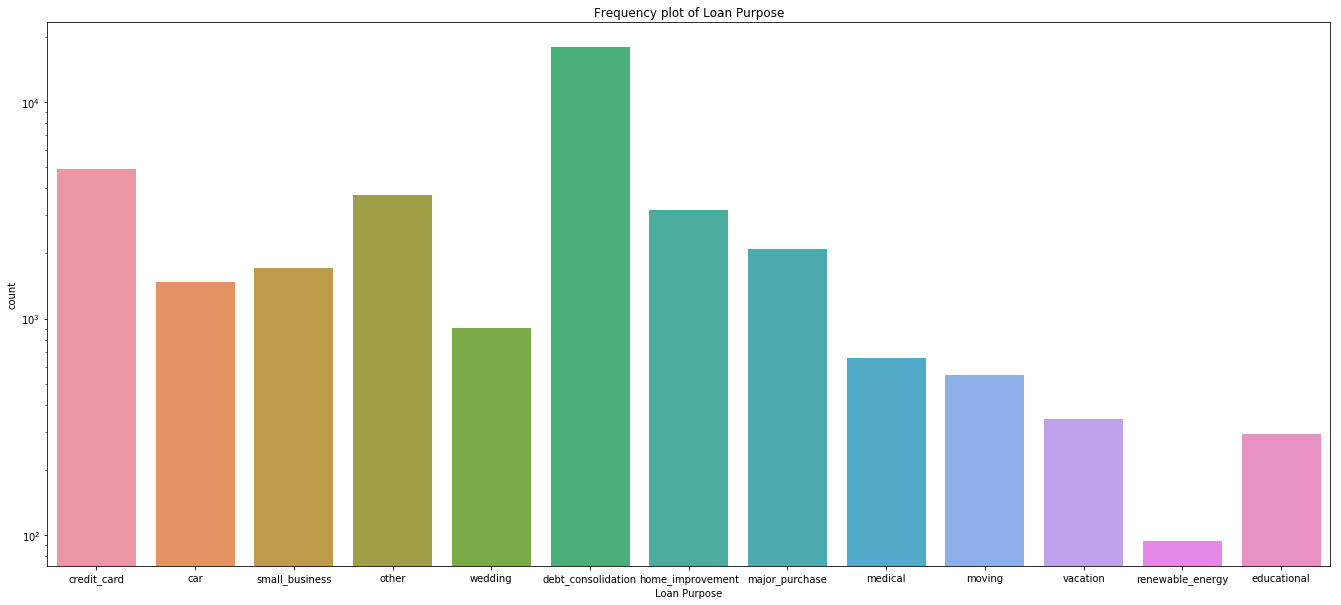

In [18]:
################    Performing univariate analysis of purpose column
fig, ax = plt.subplots()
fig.set_size_inches(23, 10)
sns.countplot(x='purpose', data=loan)
plt.title("Frequency plot of Loan Purpose")
plt.xlabel('Loan Purpose')
plt.yscale('log')
plt.show()


# Findings from performing Univariate analysis on purpose column.

# Purpose column is an unordered categorical variable

# From the above plot we can see that highest number of borrowers have taken debt consolidation loan, followed by credit_card loan, followed by other loan, home_improvement loan, etc. 



In [19]:
##########  performing univariate analysis on int_rate
##########  handling data quality issues in int_rate column

loan['int_rate'] = loan.int_rate.str.strip('%')
loan['int_rate'] = loan.int_rate.astype(float)

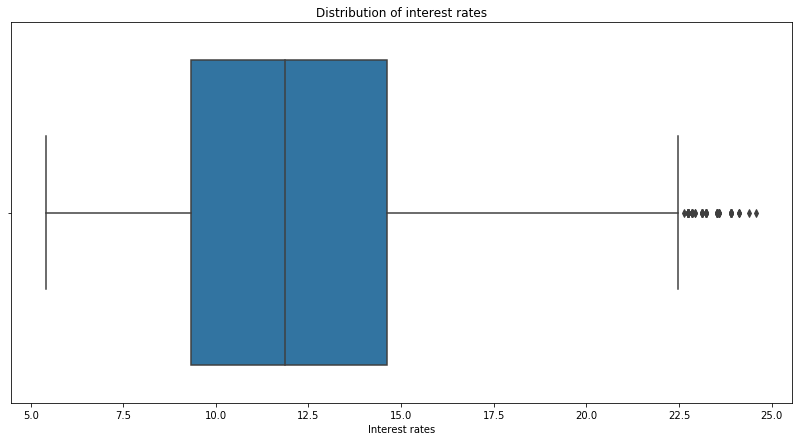

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
sns.boxplot(x='int_rate', data=loan)
plt.title('Distribution of interest rates')
plt.xlabel('Interest rates')
plt.show()


# Findings from performing Univariate analysis on int_rate column.


# From the above plot we can see that the interest rates of most of the loans are between 9% to 14.5% and median is at around 11.5%


# Outlier detection:
# From the above plot we can observe that there are outliers after the right whisker. Interest rates above 22.5% are outliers.



In [21]:
##########  performing univariate analysis on Loan Status column
########### Checking data quality issues in Loan status column

loan.loan_status.unique()

###### no data quality issues found in loan_status column. No extra spaces and no lowercase, uppercase issues

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

Text(0.5, 1.0, 'Percentage of loans fully paid, charged off and current')

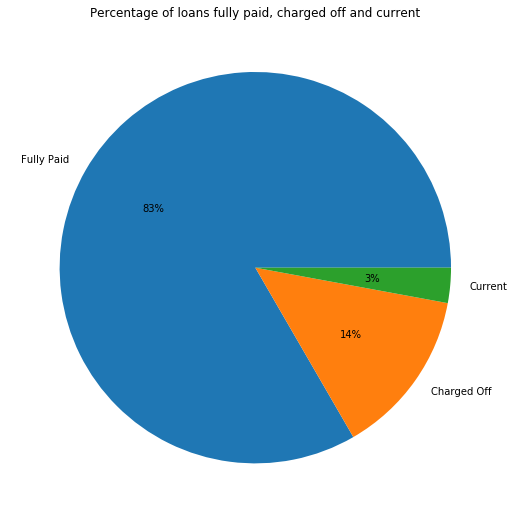

In [22]:
from itertools import chain
from collections import Counter

paid_percent = round(sum(loan.loan_status == 'Fully Paid')/len(loan) * 100, 2)
charged_off_percent = round(sum(loan.loan_status == 'Charged Off')/len(loan) * 100, 2)
current_percent = round(sum(loan.loan_status == 'Current')/len(loan) * 100, 2)

cts = Counter(loan.loan_status.unique())
fig, ax = plt.subplots()
fig.set_size_inches(10, 9)
plt.pie([paid_percent, charged_off_percent, current_percent], labels=cts.keys(), autopct='%1.0f%%')
plt.title('Percentage of loans fully paid, charged off and current')


# Findings from performing Univariate analysis on loan_status column. 

# As we can see from  the plot above that majority (83%) of the borrowers have paid the full amount back. 14% of the borrowers are charged off and 3% of the borrowers are currently repaying loans. 

# Now for analysing whether the borrower repays the loan or defaults it, we should study the patterns of borrowers who were charged off. 



In [23]:
###### As rows with loan_status = current, are not useful for analysis, we can remove those rows
loan.loan_status = loan.loc[loan.loan_status != 'Current', 'loan_status']

In [24]:
loan.grade.value_counts()

B    11463
A     9547
C     7709
D     5055
E     2742
F     1010
G      309
Name: grade, dtype: int64

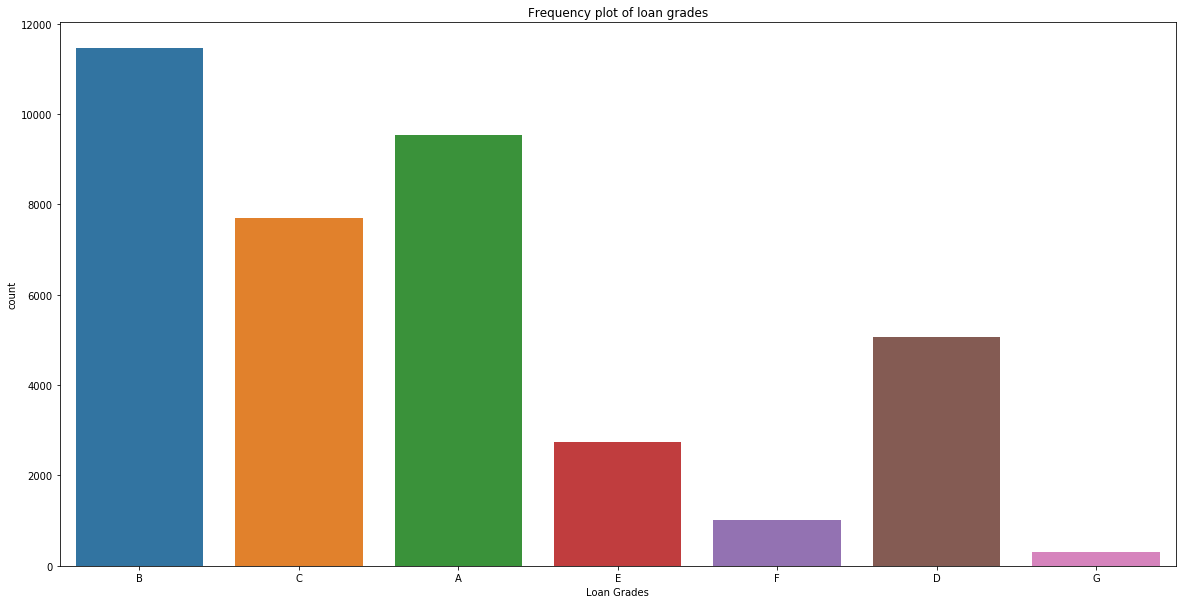

In [25]:
########## Univariate analysis on grade column

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.countplot(x='grade', data=loan)
plt.title("Frequency plot of loan grades")
plt.xlabel('Loan Grades')
plt.show()


# Findings from performing Univariate analysis on Grade column.

# Grade is a ordered categorical variable.  A < B < C < D < E < F < G

# Grade A means lower risk for lending club and Grade G means higher risk for lending club.

# From the above plot, we can see that majority of the loans were given Grade-B, followed by Grade-A, Grade-C, etc. 


In [26]:
loan.annual_inc.min()

4000.0

In [27]:
loan.annual_inc.max()

6000000.0

In [28]:
loan.annual_inc.describe()

count    3.783500e+04
mean     6.967097e+04
std      6.364337e+04
min      4.000000e+03
25%      4.188600e+04
50%      6.000000e+04
75%      8.350000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

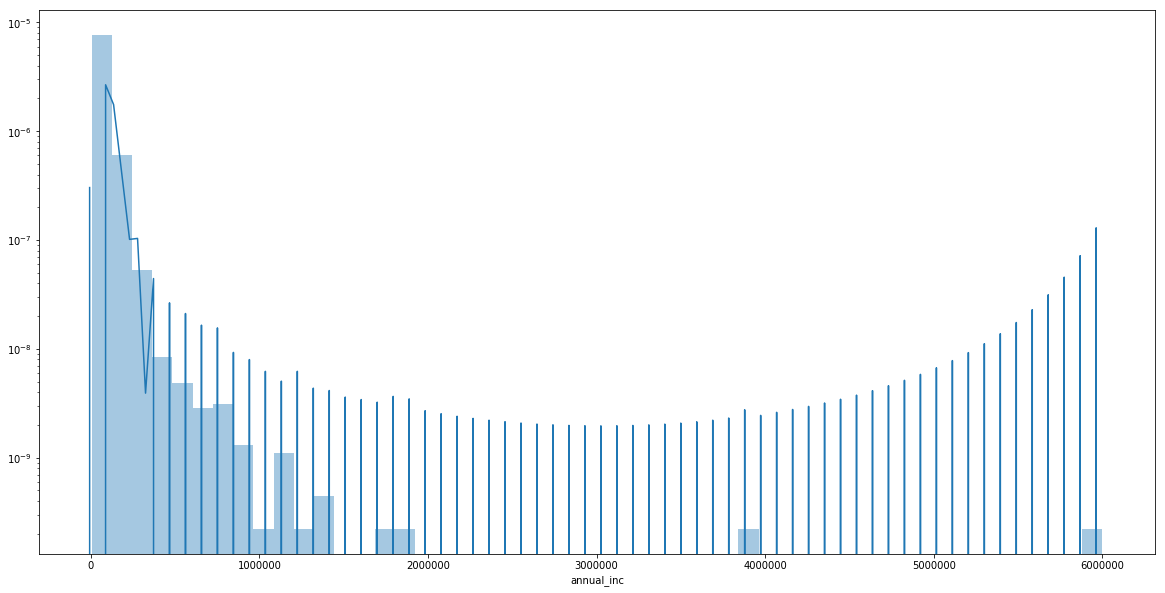

In [29]:
################    Performing univariate analysis of annual income column
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.distplot(loan['annual_inc'])
plt.yscale('log')
plt.show()

# Findings from performing Univariate analysis on Annual Income column.

# From the above plot we can see that majority of loan applicant's annual income is less than 10 lakhs.

# Outlier detection:
# From the above plot we can observe that there are some outliers. But because of very few outliers, mean has not been skewed.



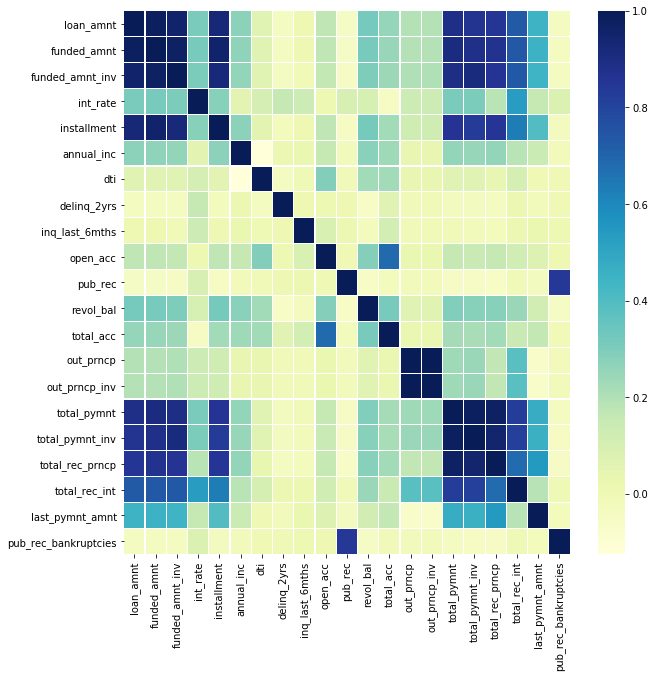

In [30]:
############### plotting a correlation matrix for entire data to identify the patterns

loan_correlation_matrix = loan.corr()
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(loan_correlation_matrix, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 
plt.show()

# loan_amnt', 'funded_amnt_inv', 'funded_amnt' are highly correlated. 

# issued some loan that differs from the requested amount

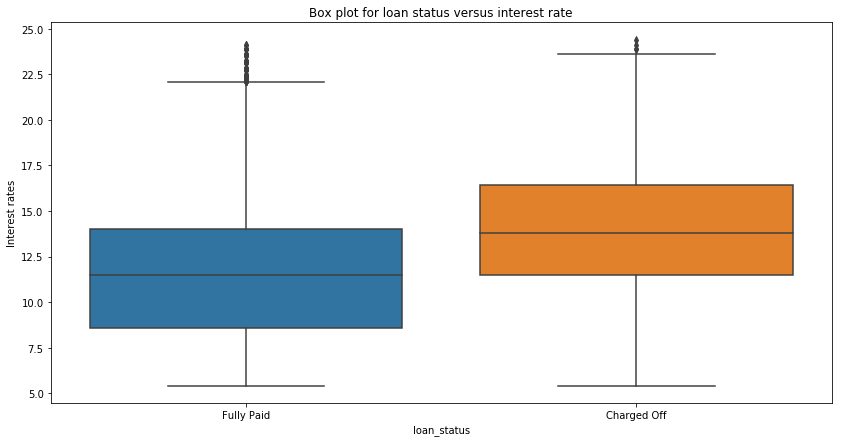

In [31]:
################# Bivariate analysis on loan status and interest rate

fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
sns.boxplot(y='int_rate', x='loan_status', data=loan)
plt.title('Box plot for loan status versus interest rate')
plt.ylabel('Interest rates')
plt.show()

# Findings from performing bivariate analysis on interest rates versus loan status.

# We can see from the above plot that higher the interest rate, higher the chances of loan getting charged off


loan_status  charged_off_percentage  fully_paid_percentage
grade                                                     
A                              5.74                  94.26
B                             11.79                  88.21
C                             16.49                  83.51
D                             21.41                  78.59
E                             26.45                  73.55
F                             32.37                  67.63
G                             32.88                  67.12


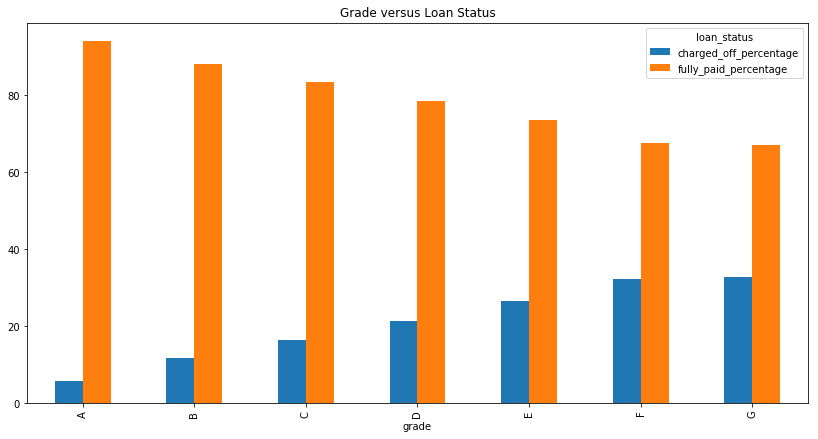

In [32]:
################# Bivariate analysis on two categorical variables loan status and grade

loan_crosstab = pd.crosstab(loan['grade'], loan['loan_status'])
loan_crosstab['sum_of_charged_off_and_fully_paid'] = loan_crosstab['Charged Off'] + loan_crosstab['Fully Paid']

### calculating percentages grade-wise
loan_crosstab['charged_off_percentage'] = round((loan_crosstab['Charged Off']/loan_crosstab.sum_of_charged_off_and_fully_paid)*100, 2)
loan_crosstab['fully_paid_percentage'] = round((loan_crosstab['Fully Paid']/loan_crosstab.sum_of_charged_off_and_fully_paid)*100, 2)

######## dropping unnecessary columns in contingency table
loan_crosstab.drop(columns=['Charged Off', 'Fully Paid', 'sum_of_charged_off_and_fully_paid'], inplace=True)
print(loan_crosstab)

loan_crosstab.sort_values(by='charged_off_percentage').plot.bar(stacked=False, figsize=(14,7),  title='Grade versus Loan Status')


# Findings from bivariate analysis on loan status versus grade
# From the above plot we can see that as we move from higer grade to lower grade i.e from Grade-A to Grade-G, the percentage of charged_off is increasing. There is a correlation between loan defaulting and grade.

loan_status  charged_off_percentage  fully_paid_percentage
term                                                      
 36 months                    10.53                  89.47
 60 months                    24.98                  75.02


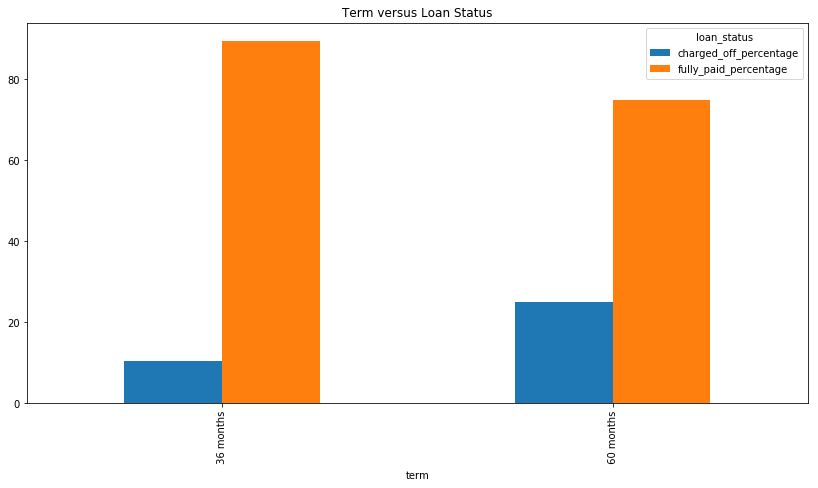

In [33]:
################# Bivariate analysis on loan status and Term


loan_crosstab = pd.crosstab(loan['term'], loan['loan_status'])
loan_crosstab['sum_of_charged_off_and_fully_paid'] = loan_crosstab['Charged Off'] + loan_crosstab['Fully Paid']

### calculating percentages
loan_crosstab['charged_off_percentage'] = round((loan_crosstab['Charged Off']/loan_crosstab.sum_of_charged_off_and_fully_paid)*100, 2)
loan_crosstab['fully_paid_percentage'] = round((loan_crosstab['Fully Paid']/loan_crosstab.sum_of_charged_off_and_fully_paid)*100, 2)

######## dropping unnecessary columns in contingency table
loan_crosstab.drop(columns=['Charged Off', 'Fully Paid', 'sum_of_charged_off_and_fully_paid'], inplace=True)
print(loan_crosstab)

loan_crosstab.sort_values(by='charged_off_percentage').plot.bar(stacked=False, figsize=(14,7),  title='Term versus Loan Status')


# From the above plot we can see that 60 months term loans are more likely to get default.

loan_status           charged_off_percentage  fully_paid_percentage
pub_rec_bankruptcies                                               
0.0                                    13.84                  86.16
1.0                                    21.60                  78.40
2.0                                    40.00                  60.00


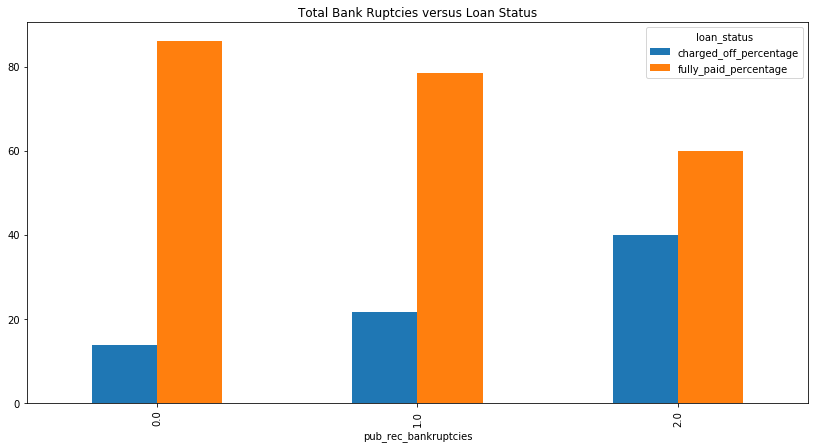

In [34]:
################# Bivariate analysis on loan status and pub_rec_bankruptcies


loan_crosstab = pd.crosstab(loan['pub_rec_bankruptcies'], loan['loan_status'])
loan_crosstab['sum_of_charged_off_and_fully_paid'] = loan_crosstab['Charged Off'] + loan_crosstab['Fully Paid']

### calculating percentages 
loan_crosstab['charged_off_percentage'] = round((loan_crosstab['Charged Off']/loan_crosstab.sum_of_charged_off_and_fully_paid)*100, 2)
loan_crosstab['fully_paid_percentage'] = round((loan_crosstab['Fully Paid']/loan_crosstab.sum_of_charged_off_and_fully_paid)*100, 2)

######## dropping unnecessary columns in contingency table
loan_crosstab.drop(columns=['Charged Off', 'Fully Paid', 'sum_of_charged_off_and_fully_paid'], inplace=True)
print(loan_crosstab)

loan_crosstab.sort_values(by='charged_off_percentage').plot.bar(stacked=False, figsize=(14,7),  title='Total Bank Ruptcies versus Loan Status')


# Customer with public bankruptcy history of 1 or more is more likely to get default 

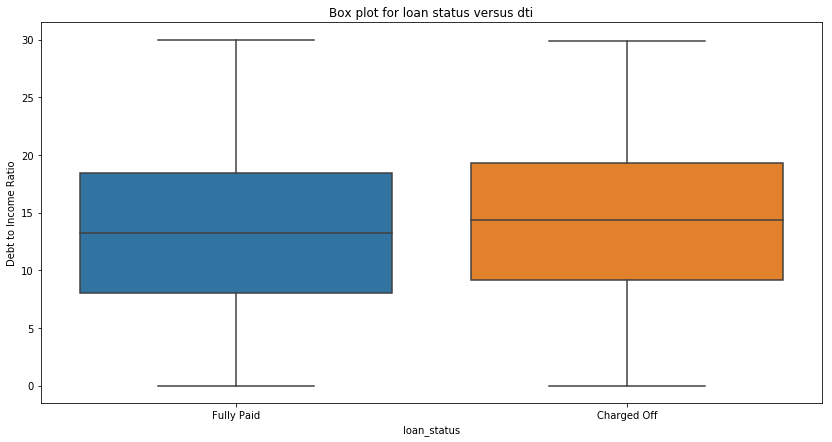

In [35]:
################# Bivariate analysis two categorical variables loan status and dti

fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
sns.boxplot(y='dti', x='loan_status', data=loan)
plt.title('Box plot for loan status versus dti')
plt.ylabel('Debt to Income Ratio')
plt.show()

# Significant correlation is not there between debt to income ratio and loan defaulting

In [36]:
##############   Derived Metrics  ##################
## Derived year from issue_d column and used it for bivariate analysis

loan.issue_d.value_counts()
loan['year'] = loan.issue_d.str.split("-").apply(lambda x: x[1])


In [37]:
loan.year

0        11
1        11
2        11
3        11
4        11
5        11
6        11
7        11
8        11
9        11
10       11
11       11
12       11
13       11
14       11
15       11
16       11
17       11
18       11
19       11
20       11
21       11
22       11
23       11
24       11
25       11
26       11
27       11
28       11
29       11
         ..
37805    08
37806    08
37807    08
37808    08
37809    08
37810    08
37811    08
37812    08
37813    08
37814    08
37815    08
37816    08
37817    08
37818    08
37819    08
37820    08
37821    08
37822    08
37823    08
37824    08
37825    08
37826    08
37827    08
37828    07
37829    07
37830    07
37831    07
37832    07
37833    07
37834    07
Name: year, Length: 37835, dtype: object

loan_status  charged_off_percentage  fully_paid_percentage
year                                                      
07                            28.57                  71.43
08                            15.31                  84.69
09                            12.35                  87.65
10                            12.43                  87.57
11                            15.51                  84.49


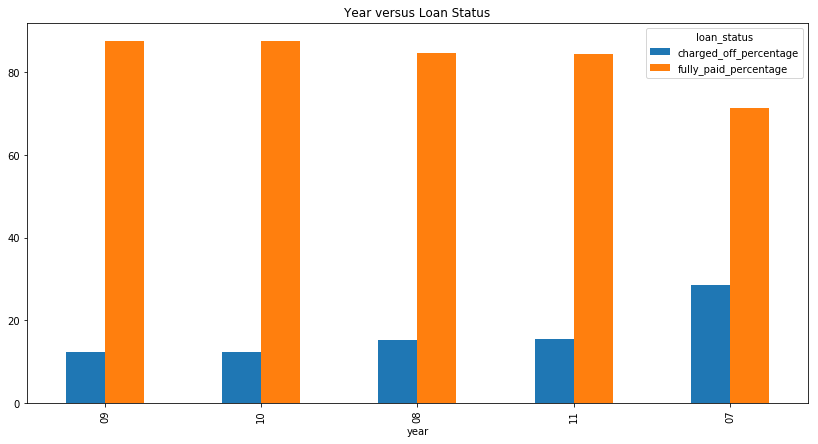

In [38]:
################# Bivariate analysis on loan status and year

loan_crosstab = pd.crosstab(loan['year'], loan['loan_status'])
loan_crosstab['sum_of_charged_off_and_fully_paid'] = loan_crosstab['Charged Off'] + loan_crosstab['Fully Paid']

### calculating percentages 
loan_crosstab['charged_off_percentage'] = round((loan_crosstab['Charged Off']/loan_crosstab.sum_of_charged_off_and_fully_paid)*100, 2)
loan_crosstab['fully_paid_percentage'] = round((loan_crosstab['Fully Paid']/loan_crosstab.sum_of_charged_off_and_fully_paid)*100, 2)

######## dropping unnecessary columns in contingency table
loan_crosstab.drop(columns=['Charged Off', 'Fully Paid', 'sum_of_charged_off_and_fully_paid'], inplace=True)
print(loan_crosstab)

loan_crosstab.sort_values(by='charged_off_percentage').plot.bar(stacked=False, figsize=(14,7),  title='Year versus Loan Status')


# In year 2007 there were more defaults probably because of recession as rest of the following year were good in terms of loan repayment. Hence Lending loans during recession could be a factor 

loan_status  charged_off_percentage  fully_paid_percentage
delinq_2yrs                                               
0                             13.96                  86.04
1                             15.24                  84.76
2                             18.80                  81.20
3                             13.20                  86.80
4                             21.82                  78.18
5                             14.29                  85.71
6                             10.00                  90.00
7                             25.00                  75.00
8                             50.00                  50.00
9                              0.00                 100.00
11                             0.00                 100.00


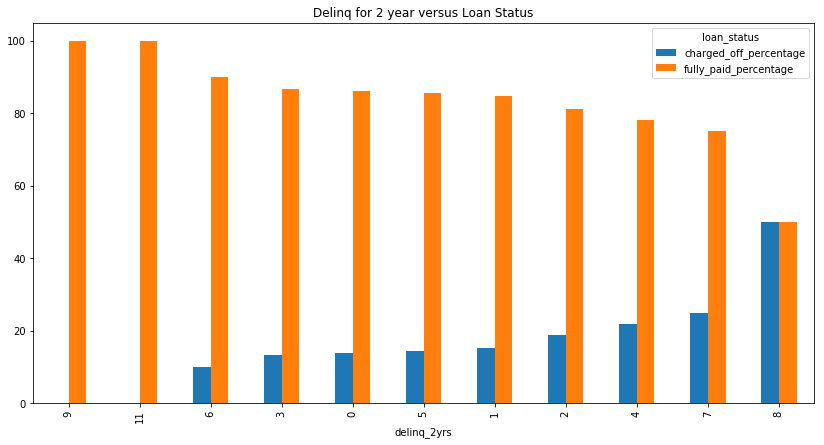

In [39]:
################# Bivariate analysis on loan status and delinq_2yrs


loan_crosstab = pd.crosstab(loan['delinq_2yrs'], loan['loan_status'])
loan_crosstab['sum_of_charged_off_and_fully_paid'] = loan_crosstab['Charged Off'] + loan_crosstab['Fully Paid']

### calculating percentages
loan_crosstab['charged_off_percentage'] = round((loan_crosstab['Charged Off']/loan_crosstab.sum_of_charged_off_and_fully_paid)*100, 2)
loan_crosstab['fully_paid_percentage'] = round((loan_crosstab['Fully Paid']/loan_crosstab.sum_of_charged_off_and_fully_paid)*100, 2)

######## dropping unnecessary columns in contingency table
loan_crosstab.drop(columns=['Charged Off', 'Fully Paid', 'sum_of_charged_off_and_fully_paid'], inplace=True)
print(loan_crosstab)

loan_crosstab.sort_values(by='charged_off_percentage').plot.bar(stacked=False, figsize=(14,7),  title='Delinq for 2 year versus Loan Status')


# Delinq_2 years - customers who were delinquent for 7 and 8 times in last 2 years were tend to default 25% and 50% of the times. But this factor wouldn't help us much as waiting for such long time without any action would not be a wise thing to do

loan_status  charged_off_percentage  fully_paid_percentage
addr_state                                                
AK                            20.00                  80.00
AL                            11.98                  88.02
AR                            11.66                  88.34
AZ                            14.29                  85.71
CA                            15.50                  84.50
CO                            12.07                  87.93
CT                            12.36                  87.64
DC                             6.80                  93.20
DE                            10.28                  89.72
FL                            17.40                  82.60
GA                            15.48                  84.52
HI                            17.50                  82.50
IA                             0.00                 100.00
ID                             0.00                 100.00
IL                            13.24                  86.

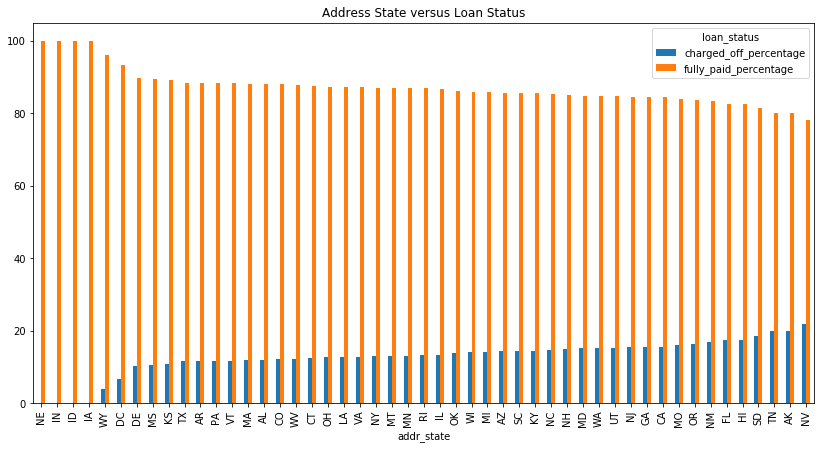

In [40]:
################# Bivariate analysis on loan status and addr_state


loan_crosstab = pd.crosstab(loan['addr_state'], loan['loan_status'])
loan_crosstab['sum_of_charged_off_and_fully_paid'] = loan_crosstab['Charged Off'] + loan_crosstab['Fully Paid']

### calculating percentages
loan_crosstab['charged_off_percentage'] = round((loan_crosstab['Charged Off']/loan_crosstab.sum_of_charged_off_and_fully_paid)*100, 2)
loan_crosstab['fully_paid_percentage'] = round((loan_crosstab['Fully Paid']/loan_crosstab.sum_of_charged_off_and_fully_paid)*100, 2)

######## dropping unnecessary columns in contingency table
loan_crosstab.drop(columns=['Charged Off', 'Fully Paid', 'sum_of_charged_off_and_fully_paid'], inplace=True)
print(loan_crosstab)
loan_crosstab.sort_values(by='charged_off_percentage').plot.bar(stacked=False, figsize=(14,7),  title='Address State versus Loan Status')


# TN, AK and NV has seen most number of default cases compared to the other states. Lending club should be extra cautious while lending in these states 

loan_status  charged_off_percentage  fully_paid_percentage
emp_length                                                
1 year                        14.05                  85.95
10+ years                     15.47                  84.53
2 years                       13.05                  86.95
3 years                       13.79                  86.21
4 years                       13.42                  86.58
5 years                       14.12                  85.88
6 years                       13.97                  86.03
7 years                       15.25                  84.75
8 years                       13.87                  86.13
9 years                       12.77                  87.23
< 1 year                      13.93                  86.07


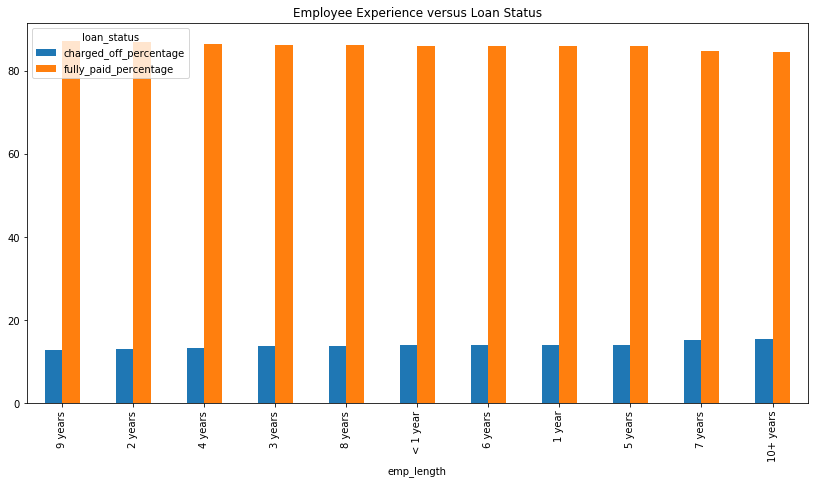

In [41]:
################# Bivariate analysis two categorical variables loan status and employee length

loan_crosstab = pd.crosstab(loan['emp_length'], loan['loan_status'], normalize=True).round(4)*100 
loan_crosstab['sum_of_charged_off_and_fully_paid'] = loan_crosstab['Charged Off'] + loan_crosstab['Fully Paid']

### calculating percentages
loan_crosstab['charged_off_percentage'] = round((loan_crosstab['Charged Off']/loan_crosstab.sum_of_charged_off_and_fully_paid)*100, 2)
loan_crosstab['fully_paid_percentage'] = round((loan_crosstab['Fully Paid']/loan_crosstab.sum_of_charged_off_and_fully_paid)*100, 2)

######## dropping unnecessary columns in contingency table
loan_crosstab.drop(columns=['Charged Off', 'Fully Paid', 'sum_of_charged_off_and_fully_paid'], inplace=True)

print(loan_crosstab)

loan_crosstab.sort_values(by='charged_off_percentage').plot.bar(stacked=False, figsize=(14,7),  title='Employee Experience versus Loan Status')


# Could not find any correlation between employee length and loan defaulting